# Исследование



**Цель исследования** - определить потенциально популярный продукт и спланировать рекламные кампании.


Доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 

Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Данные до 2016 года. Считаем, что сейчас декабрь 2016 г., и необходимо спланировать кампанию на 2017-й.

## Изучение данных из файла

**1.1 Описание данных**

- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.


Выгрузим данные таблицы в следующий датафрейм:

data - games.csv

In [1]:
# Импорт необходимых библиотек
import os
import pandas as pd
import numpy as np
from scipy import stats as st
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
# Загрузка файла данных
#data_path_local = 'C:/Users/Maroznik/Documents/dev/Яндекс.Практикум/projects/data/project_3/real_estate_data.csv'
'''
data_path_local_1 = 'C:/Users/Asus3/Documents/Яндекс.Практикум/projects/data/project_5/gemes.csv
'''
#данные локально
'''
data_path_local = 'C:/Users/ruleva_ad/Desktop/projects/data/project_5/games.csv'

'''
data_path_local = 'C:/Users/Maroznik/Documents/dev/Яндекс.Практикум/projects/data/project_5/games.csv'

#данные на сервере
data_path_server = '/datasets/games.csv'

#чтение из файла 
#if os.path.exists(data_path_local):
   # data = pd.read_csv(data_path_local, sep=',')
    
if os.path.exists(data_path_local):
    data = pd.read_csv(data_path_local, sep=',')
    print('Успешное чтение файлов')
elif os.path.exists(data_path_server):
    data = pd.read_csv(data_path_server, sep=',')
else:
    print('Путь к файлу не найден')

Успешное чтение файлов


In [3]:
pd.set_option('display.max_columns', None)

### 1. Информация об играх:

In [4]:
data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Вывод

При первичном изучении датафрейма обнаружены следующие недостатки, которые необходимо устранить:
1. Записать названия столбцов по правилам змеиного регистра;
2. Найти возможные артефакты в столбцах и избавиться от них;
3. Избавиться от пропусков в столбцах ;
4. Преобразовать типы;
5. Проверить на наличие дубликатов и удалить их, если они обнаружатся.

## 1. Предобработка данных

### 1.1 Переименование столбцов

Запишем названия всех столбцов по правилам змеиного регистра. Для этого достаточно привести их к нижнему регистру:

In [6]:
data.columns = data.columns.str.lower()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Вывод**

Проблема с названиями столбцов устранена.

###  1.2 Поиск артефактов

#### 1.2.1. Столбец `name`. 
Поскольку название игры может быть любым, то артефакты, даже если они существуют, найти не представляется возможным:

In [7]:
print('Множество значений в столбце "name" :\n', data['name'].unique())

Множество значений в столбце "name" :
 ['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']


#### 1.2.2. Столбец `platform`:

In [8]:
print('Множество значений в столбце "platform" :\n', data['platform'].unique())

Множество значений в столбце "platform" :
 ['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


Аномальных значений не обнаружено.

#### 1.2.3. Столбец `year_of_release`:

In [9]:
print('Множество значений в столбце "year_of_release" :\n', data['year_of_release'].unique())

Множество значений в столбце "year_of_release" :
 [2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2016. 2003. 1986. 2000.   nan 1995. 1991. 1981. 1987.
 1980. 1983.]


Аномальных значений не обнаружено.

#### 1.2.4. Столбец `genre`:

In [10]:
print('Множество значений в столбце "genre" :\n', data['genre'].unique())

Множество значений в столбце "genre" :
 ['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]


Аномальных значений не обнаружено.

#### 1.2.5. Столбец `na_sales`:

In [11]:
print('Минимальное значение в столбце "na_sales" =', data['na_sales'].min())
print('Максимальное значение в столбце "na_sales" =', data['na_sales'].max())

Минимальное значение в столбце "na_sales" = 0.0
Максимальное значение в столбце "na_sales" = 41.36


Аномальных значений не обнаружено.

#### 1.2.6. Столбец `eu_sales`:

In [12]:
print('Минимальное значение в столбце "eu_sales" =', data['eu_sales'].min())
print('Максимальное значение в столбце "eu_sales" =', data['eu_sales'].max())

Минимальное значение в столбце "eu_sales" = 0.0
Максимальное значение в столбце "eu_sales" = 28.96


Аномальных значений не обнаружено.

#### 1.2.7. Столбец `jp_sales`:

In [13]:
print('Минимальное значение в столбце "jp_sales" =', data['jp_sales'].min())
print('Максимальное значение в столбце "jp_sales" =', data['jp_sales'].max())

Минимальное значение в столбце "jp_sales" = 0.0
Максимальное значение в столбце "jp_sales" = 10.22


Аномальных значений не обнаружено.

#### 1.2.8. Столбец `other_sales`:

In [14]:
print('Минимальное значение в столбце "other_sales" =', data['other_sales'].min())
print('Максимальное значение в столбце "other_sales" =', data['other_sales'].max())

Минимальное значение в столбце "other_sales" = 0.0
Максимальное значение в столбце "other_sales" = 10.57


Аномальных значений не обнаружено.

#### 1.2.9. Столбец `critic_score`:

In [15]:
print('Минимальное значение в столбце "critic_score" =', data['critic_score'].min())
print('Максимальное значение в столбце "critic_score" =', data['critic_score'].max())

Минимальное значение в столбце "critic_score" = 13.0
Максимальное значение в столбце "critic_score" = 98.0


Аномальных значений не обнаружено.

#### 1.2.10. Столбец `user_score`:

In [16]:
print('Множество значений в столбце "user_score" :\n', data['user_score'].unique())

Множество значений в столбце "user_score" :
 ['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


Аномальным является значение `tbd`. Это аббревиатура от 'to be determined'- будет определено, то есть один из вариантов обозначения пропуска, поэтому будем заментяь эти значения также, как и заполнять пропуски.

Заменим эти значения пропусками - nan.

In [17]:
data.loc[(data.user_score == 'tbd'), 'user_score'] = np.nan
data.info()
data.query('user_score == "tbd"').head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


#### 1.2.11. Столбец `rating`:

In [18]:
print('Множество значений в столбце "rating" :\n', data['rating'].unique())

Множество значений в столбце "rating" :
 ['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


Аномальных значений не обнаружено, но есть неявный дубликат: 'E' ("Everyone", 1998-н.в.) и 'K-A' ("Kids to Adults", 1994-1997 гг.)- обозначение возрастной категории 6+. Заменим устаревшее значение на современное:

In [19]:
data.loc[(data.rating == 'K-A'), 'rating'] = 'E'
print('Множество значений в столбце "rating" :\n', data['rating'].unique())

Множество значений в столбце "rating" :
 ['E' nan 'M' 'T' 'E10+' 'AO' 'EC' 'RP']


Проблема устранена.

**Вывод**

Артефакты были найдены и устранены в столбцах `user_score` и `rating`

### 1.3 Заполнение пропусков

#### 1.3.1. Столбец `name`.

In [20]:
data[data['name'].isna() > 0]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Таких строк всего две, при этом практически все данные об этих играх отсутствуют, и корректно заполнить все пропуски не представляется возможным. Поэтому удалим эти данные из рассмотрения.

In [21]:
data = data.dropna(subset=['name'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


#### 1.3.2. Столбец `year_of_release`.

Заполним медианой по столбцу:

In [22]:
warnings.filterwarnings('ignore')

#median = data['year_of_release'].median()
#print(f'Медиана столбца "year_of_release" = {median}\n')
#data['year_of_release'] = data['year_of_release'].fillna(median)
#data.info()

Пропусков года релиза всего 1,6%. Удалим их, поскольку это не сильно повлияет на конечный результат исследования.

In [23]:
data = data.dropna(subset=['year_of_release']).reset_index(drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


#### 1.3.3. Столбцы `critic_score` и `user_score`.

Сначала приведем тип в столбце `user_score`:

In [24]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='ignore')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


Поскольку шкала оценок критиков 0-100, а игроков 0-10, то приведем к одной шкале: домножим значения столбца `user_score` на 10

In [25]:
warnings.filterwarnings('ignore')
data['user_score'] = data['user_score'] * 10

Выделим случаи, где есть хотя бы одна оценка:

In [26]:
data[((data['critic_score'].isna() > 0) ^ (data['user_score'].isna() > 0))]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
182,Tomb Raider II,PS,1997.0,Action,2.30,2.46,0.20,0.28,85.0,NaN,T
254,Call of Duty: Advanced Warfare,PS3,2014.0,Shooter,1.56,1.93,0.19,0.68,NaN,48.0,M
262,Call of Duty: Advanced Warfare,X360,2014.0,Shooter,2.77,1.11,0.00,0.40,NaN,49.0,M
263,FIFA 15,PS3,2014.0,Sports,0.58,3.02,0.04,0.64,NaN,45.0,E
290,World Soccer Winning Eleven 9,PS2,2005.0,Sports,0.12,2.26,0.90,0.77,NaN,82.0,E
...,...,...,...,...,...,...,...,...,...,...,...
16398,Super Robot Taisen: Original Generation,GBA,2002.0,Role-Playing,0.01,0.00,0.00,0.00,72.0,NaN,T
16410,Worms 2,PC,1997.0,Strategy,0.00,0.01,0.00,0.00,NaN,81.0,E
16424,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.00,0.00,67.0,NaN,E
16426,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.00,0.00,53.0,NaN,E


Для заполнения пропусков в данных строках и столбцах выдвенем такую гипотезу: средняя оценка критиков равна средней оценке пользователей. Если гипотеза верна, то заполним пропуски значением соседнего столбца.
Размеры выборок разные, поэтому применим t-тест для двух генеральных совокупностей с параметром `equal_var = False`

In [27]:
data[(data['critic_score'].isna() == 0) & (data['user_score'].isna() == 0)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,80.0,E
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,83.0,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,80.0,E
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,85.0,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,66.0,E
...,...,...,...,...,...,...,...,...,...,...,...
16402,Mortal Kombat: Deadly Alliance,GBA,2002.0,Fighting,0.01,0.00,0.00,0.00,81.0,88.0,M
16421,Metal Gear Solid V: Ground Zeroes,PC,2014.0,Action,0.00,0.01,0.00,0.00,80.0,76.0,M
16425,Breach,PC,2011.0,Shooter,0.01,0.00,0.00,0.00,61.0,58.0,T
16431,STORM: Frontline Nation,PC,2011.0,Strategy,0.00,0.01,0.00,0.00,60.0,72.0,E10+


In [28]:
alpha = 0.05
score_results = st.ttest_ind(
    data[(data['critic_score'].isna() == 0) & (data['user_score'].isna() == 0)]['critic_score'],
    data[(data['critic_score'].isna() == 0) & (data['user_score'].isna() == 0)]['user_score'],
    equal_var = False) 

print('p-значение:', score_results.pvalue) 

if (score_results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.6819885112237124e-11
Отвергаем нулевую гипотезу


Таким путем заполнить пропуски не получится, поэтому заполним медианой по значениям, сгруппированным по жанру

In [29]:
#warnings.filterwarnings('ignore')
#medians_by_critics = data.groupby(by=['genre'])['critic_score'].agg('median')
#medians_by_users = data.groupby(by=['genre'])['user_score'].agg('median')
#indexes = data[data['critic_score'].isna() > 0].index
#for index in indexes:
#    data.loc[(data.index == index), 'critic_score'] = medians_by_critics[data.loc[(data.index == index), 'genre'].values[0]]  
#indexes = data[data['user_score'].isna() > 0].index
#for index in indexes:
#    data.loc[(data.index == index), 'user_score'] = medians_by_users[data.loc[(data.index == index), 'genre'].values[0]]  
#data.info()

In [30]:
data[['critic_score', 'user_score']] = data[['critic_score', 'user_score']].fillna(-1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           9768 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


#### 1.3.4. Столбец `rating`.

Заполним медианой по значениям, сгруппированным по жанру:

In [31]:
#warnings.filterwarnings('ignore')
#medians_by_genre = data.groupby(['genre','rating'])['rating'].agg(['count']).sort_values(['count'],ascending=False).groupby(level=0).head(1)
#display(medians_by_genre)
#indexes = data[data['rating'].isna() > 0].index
#for index in indexes:
    #display(medians_by_genre[medians_by_genre.index.get_level_values(0) == data.loc[(data.index == index), 'genre'][index]].index.get_level_values(1)[0])
#    data.loc[(data.index == index), 'rating'] = (
#        medians_by_genre[medians_by_genre.index.get_level_values(0) == data.loc[(data.index == index), 'genre'][index]].index.get_level_values(1)[0])  

Как в предыдущем пункте, заполним характерным значением `other`, который будет индикатором отсутствия рейтинга.

In [32]:
data['rating'] = data['rating'].fillna('other')
data.info()
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,80.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,other
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,83.0,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,80.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,other
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,-1.0,-1.0,other
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,85.0,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,66.0,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,84.0,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,-1.0,-1.0,other


**Вывод**

Пропуски в названии игры могли быть вызваны неправильной выгрузкой данных, в столбце "год релиза"- разными годами выхода на разных платформах одной и той же игры, в столбце оценок игроков- игра еще не вышла для всех пользователей, а остается под эмбарго для критиков и журналистов, в столбце рейтинга- тем, что возрастной ценз был присвоен другой организацией.
Пропуски в столбцах `name`,`year_of_release`,`user_score` и `rating` были заполнены.

### 1.4 Изменение типов данных

In [33]:
data = (data.astype({'year_of_release': np.int32, 'critic_score': np.int8, 'user_score': np.int8,
                    'jp_sales': np.float32, 'other_sales': np.float32}))
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float32
 7   other_sales      16444 non-null  float32
 8   critic_score     16444 non-null  int8   
 9   user_score       16444 non-null  int8   
 10  rating           16444 non-null  object 
dtypes: float32(2), float64(2), int32(1), int8(2), object(4)
memory usage: 995.8+ KB


**Вывод**

В столбцах "год выпуска" и оценках критиков и игроков заменили тип на целочисленный, в соответствии со смыслом переменной и в пользу экономии места. Столбецы продаж в Японии и общих привели к меньшему типу с плавающей запятой в пользу экономии места и из-за возможности сделать это без потери точности.

### 1.4 Поиск дубликатов

Найдем дубликаты в таблице:

In [34]:
str_columns = ['name', 'platform', 'genre', 'rating']
for column in str_columns:
    data[column] = data[column].str.lower()
print('Количество дубликатов в таблице =', data.duplicated().sum())
data

Количество дубликатов в таблице = 0


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76,80,e
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,-1,-1,other
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82,83,e
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80,80,e
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,-1,-1,other
...,...,...,...,...,...,...,...,...,...,...,...
16439,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,-1,-1,other
16440,lma manager 2007,x360,2006,sports,0.00,0.01,0.00,0.00,-1,-1,other
16441,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,-1,-1,other
16442,spirits & spells,gba,2003,platform,0.01,0.00,0.00,0.00,-1,-1,other


**Вывод**

Количество дубликатов равно нулю. Все значения в датафрейме уникальные и не имеют повторения

### 1.5 Общие продажи

Посчитаем суммарные продажи во всех регионах:

In [35]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76,80,e,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,-1,-1,other,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82,83,e,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80,80,e,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,-1,-1,other,31.38
5,tetris,gb,1989,puzzle,23.20,2.26,4.22,0.58,-1,-1,other,30.26
6,new super mario bros.,ds,2006,platform,11.28,9.14,6.50,2.88,89,85,e,29.80
7,wii play,wii,2006,misc,13.96,9.18,2.93,2.84,58,66,e,28.91
8,new super mario bros. wii,wii,2009,platform,14.44,6.94,4.70,2.24,87,84,e,28.32
9,duck hunt,nes,1984,shooter,26.93,0.63,0.28,0.47,-1,-1,other,28.31


**Вывод**

Посчитали и добавили суммарные продажи в таблицу.

## 2. Исследовательский анализ данных

### 2.1 Продажи игр по годам

<AxesSubplot:xlabel='year_of_release', ylabel='total_sales'>

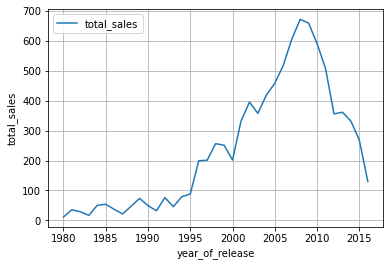

In [36]:
data.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').sort_values(by='year_of_release').plot(grid=True, ylabel='total_sales')

**Вывод**

Из графика видно, что данные до 1996 года не очень важны, поскольку до этого ежегодные продажи оставались примерно на одном низком уровне, а с 1996 года, в связи с развитием технологий, произошел скачок ежегодных продаж.

### 2.2 Продажи игр наиболее популярных платформ по годам

Возьмем топ-6, поскольку после этого топа, суммарные продажи значительно ниже.

In [37]:
top_platform = data.groupby(['platform'])['total_sales'].agg(['sum']).sort_values(['sum'],ascending=False)
display(top_platform)
top_platform = top_platform.head(6)
display(top_platform)

,sum
platform,
ps2,1233.559999
x360,961.240000
ps3,931.340000
wii,891.179999
ds,802.780000
ps,727.580000
ps4,314.140000
gba,312.880000
psp,289.530000


,sum
platform,
ps2,1233.559999
x360,961.240000
ps3,931.340000
wii,891.179999
ds,802.780000
ps,727.580000


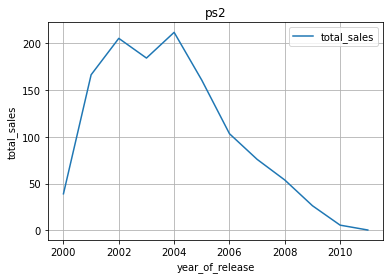

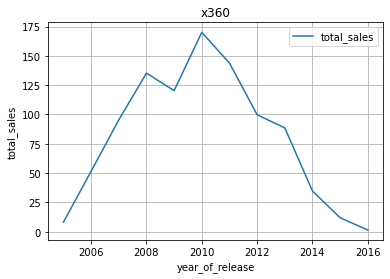

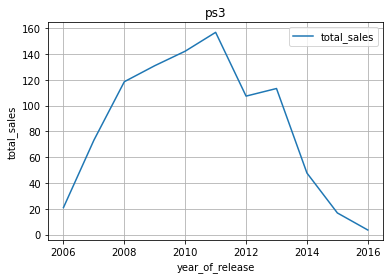

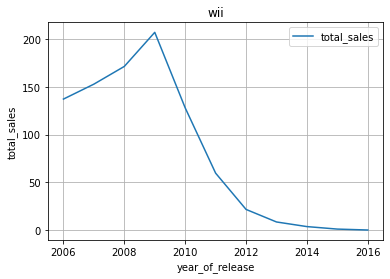

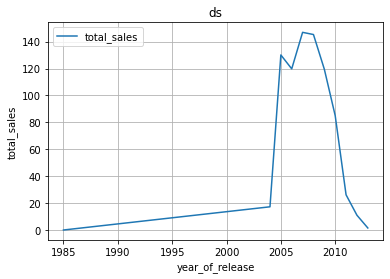

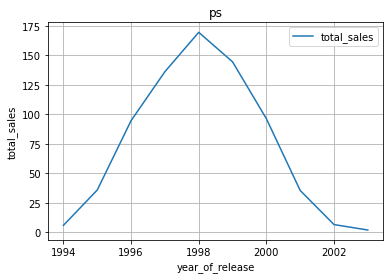

In [38]:
for index in top_platform.index:
    data[data['platform'] == index].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').sort_values(by='year_of_release').plot(title=index, grid=True, ylabel='total_sales')

**Вывод**

Как видно из графиков, характерный период популярности платформы- 10 лет. Поэтому актуальными будем считать платформы, которые вышли после 2012 года и персональные компьютеры, поскольку они актуальны всегда из-за возможности их модернизации.

### 2.3 Актуальные данные

In [39]:
years_of_release = data.groupby(['platform'])['year_of_release'].agg(['min'])
years_of_release = years_of_release[years_of_release['min'] > 2012]
years_of_release.loc['pc'] = 2013
display(years_of_release)
actual_data = data.query('year_of_release > 2012')
actual_platforms = data.query('(platform in @years_of_release.index) and (year_of_release > 2012)')
actual_platforms = actual_platforms.reset_index(drop=True)

,min
platform,
ps4,2013
xone,2013
pc,2013


In [40]:
actual_platforms.info()
actual_platforms

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 828 entries, 0 to 827
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             828 non-null    object 
 1   platform         828 non-null    object 
 2   year_of_release  828 non-null    int32  
 3   genre            828 non-null    object 
 4   na_sales         828 non-null    float64
 5   eu_sales         828 non-null    float64
 6   jp_sales         828 non-null    float32
 7   other_sales      828 non-null    float32
 8   critic_score     828 non-null    int8   
 9   user_score       828 non-null    int8   
 10  rating           828 non-null    object 
 11  total_sales      828 non-null    float64
dtypes: float32(2), float64(3), int32(1), int8(2), object(4)
memory usage: 56.7+ KB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,-1,-1,other,14.63
1,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97,83,m,12.62
2,fifa 16,ps4,2015,sports,1.12,6.12,0.06,1.28,82,43,e,8.58
3,star wars battlefront (2015),ps4,2015,shooter,2.99,3.49,0.22,1.28,-1,-1,other,7.98
4,call of duty: advanced warfare,ps4,2014,shooter,2.81,3.48,0.14,1.23,83,57,m,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...
823,rugby challenge 3,xone,2016,sports,0.00,0.01,0.00,0.00,-1,66,e,0.01
824,zombiu,xone,2016,action,0.00,0.01,0.00,0.00,-1,-1,other,0.01
825,prison architect,xone,2016,action,0.01,0.00,0.00,0.00,74,67,other,0.01
826,metal gear solid v: the definitive experience,xone,2016,action,0.01,0.00,0.00,0.00,-1,-1,m,0.01


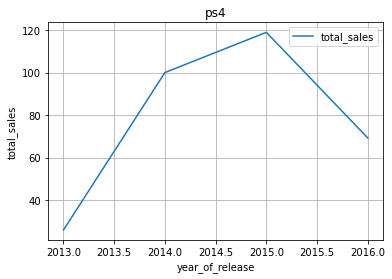

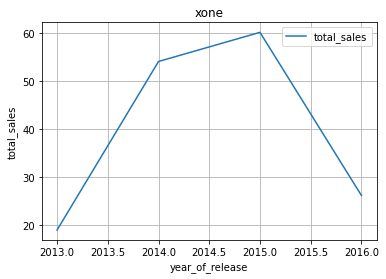

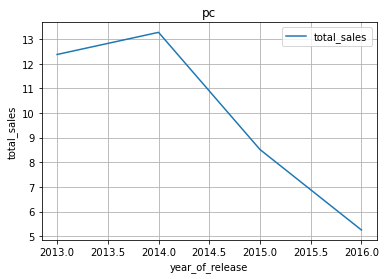

In [41]:
for index in years_of_release.index:
    actual_platforms[actual_platforms['platform'] == index].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').sort_values(by='year_of_release').plot(title=index, grid=True, ylabel='total_sales')

Среди актуальных платформ нет растущих показателей продаж. Лидерами среди них по состоянию на 2016 год являются ps4 и xone (70 и 26 млн копий). Помимо этого данные платформы будут актуальны еще примерно 6-7 лет. pc не стоит рассматривать, так как ее показатели на 2016 год достаточно низкие и нет причин ожидать скачка продаж как в 2011. Таким образом потенциально прибыльны два варианта: ps4 и xone.

In [42]:
top_actual_platforms = actual_platforms.query('(platform == "ps4") or (platform == "xone")')
top_actual_platforms = top_actual_platforms.reset_index(drop=True)
top_actual_platforms.info()
top_actual_platforms

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639 entries, 0 to 638
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             639 non-null    object 
 1   platform         639 non-null    object 
 2   year_of_release  639 non-null    int32  
 3   genre            639 non-null    object 
 4   na_sales         639 non-null    float64
 5   eu_sales         639 non-null    float64
 6   jp_sales         639 non-null    float32
 7   other_sales      639 non-null    float32
 8   critic_score     639 non-null    int8   
 9   user_score       639 non-null    int8   
 10  rating           639 non-null    object 
 11  total_sales      639 non-null    float64
dtypes: float32(2), float64(3), int32(1), int8(2), object(4)
memory usage: 43.8+ KB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,-1,-1,other,14.63
1,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97,83,m,12.62
2,fifa 16,ps4,2015,sports,1.12,6.12,0.06,1.28,82,43,e,8.58
3,star wars battlefront (2015),ps4,2015,shooter,2.99,3.49,0.22,1.28,-1,-1,other,7.98
4,call of duty: advanced warfare,ps4,2014,shooter,2.81,3.48,0.14,1.23,83,57,m,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...
634,sébastien loeb rally evo,xone,2016,racing,0.00,0.01,0.00,0.00,63,82,e,0.01
635,rugby challenge 3,xone,2016,sports,0.00,0.01,0.00,0.00,-1,66,e,0.01
636,zombiu,xone,2016,action,0.00,0.01,0.00,0.00,-1,-1,other,0.01
637,prison architect,xone,2016,action,0.01,0.00,0.00,0.00,74,67,other,0.01


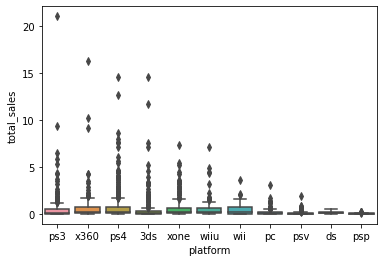

(0.0, 2.0)

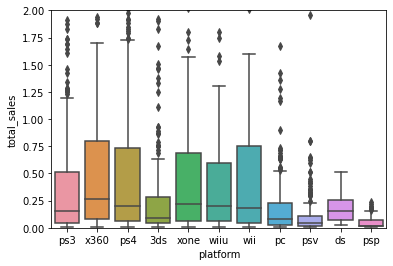

In [43]:
sns.boxplot(x='platform', y='total_sales', data=actual_data)
plt.show()
sns.boxplot(x='platform', y='total_sales', data=actual_data).set_ylim([0, 2])
#actual_data.boxplot(column=['total_sales'], by=['platform'])
#plt.show()
#actual_data.boxplot(column=['total_sales'], by=['platform'])
#plt.ylim(0, 2)
#plt.show()

In [44]:
actual_data.groupby(by='platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3ds,303.0,0.472772,1.381347,0.01,0.0400,0.090,0.2800,14.60
ds,8.0,0.192500,0.172026,0.03,0.0675,0.150,0.2525,0.51
pc,189.0,0.208624,0.352304,0.01,0.0300,0.080,0.2300,3.05
ps3,345.0,0.525884,1.451939,0.01,0.0400,0.150,0.5100,21.05
ps4,392.0,0.801378,1.609456,0.01,0.0600,0.200,0.7300,14.63
psp,67.0,0.052239,0.059768,0.01,0.0150,0.020,0.0700,0.24
psv,358.0,0.092151,0.153816,0.01,0.0200,0.040,0.1100,1.96
wii,23.0,0.593913,0.915432,0.01,0.0450,0.180,0.7550,3.58
wiiu,115.0,0.562000,1.038778,0.01,0.0600,0.200,0.5950,7.09


Наилучший показатель медианных продаж у x360, однако данная платформа уже неактуальна. Среди платформ с наибольшими продажами достаточно много аномально успешных игр, которые оказывают сильное влияние на суммарные продажи. Среди актуальных платформ у ps4 встречается большее количество феноменально успешных игр, из-за чего у ps4 продаж примерно в 1.5 раза больше, однако у xone медианное значение продаж на 10% больше. Общие и медианные продажи pc относительно других актуальных платформ достаточно низкие.

Рассмотрим влияние отзывов критиков и пользователей на продажи у ps4. Построим диаграмму рассеяния:

Корреляция между оценками критиков и продажами = 0.22652606560122013
Корреляция между оценками пользователей и продажами = 0.11344360206138501


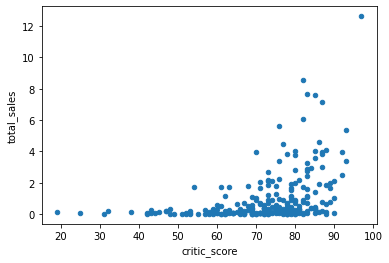

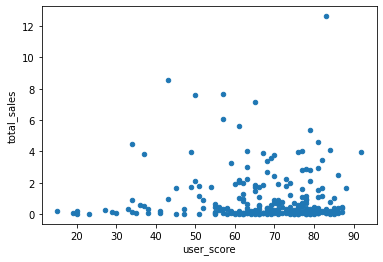

In [45]:
top_actual_platforms.query('platform == "ps4" and critic_score >= 0').plot(x='critic_score', y='total_sales', kind='scatter')
print('Корреляция между оценками критиков и продажами =', top_actual_platforms.query('platform == "ps4"')['critic_score'].corr(top_actual_platforms.query('platform == "ps4"')['total_sales']))
top_actual_platforms.query('platform == "ps4" and user_score >= 0').plot(x='user_score', y='total_sales', kind='scatter')
print('Корреляция между оценками пользователей и продажами =', top_actual_platforms.query('platform == "ps4"')['user_score'].corr(top_actual_platforms.query('platform == "ps4"')['total_sales']))

Корреляция между оценками критиков и продажами положительная и более ярко выражена, в то время как корреляция между оценками пользователей и продажами в разы ниже. Это значит, что продажи прямопропорциональны оценкам критиков, но о сильном влиянии на продажи оценок пользователей говорить нельзя. 

Проверим эти взаимосвязи на другой актуальной платформе xone, на современной на момент анализа платформе другого производителя wiiu и на универсальной и самой распространенной платформе- pc

Корреляция между оценками критиков и продажами = 0.2737821725977997
Корреляция между оценками пользователей и продажами = 0.1171512807871208


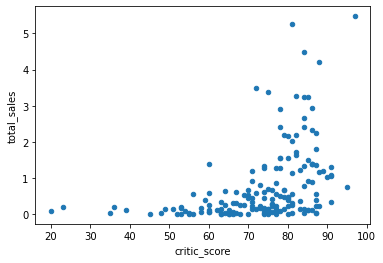

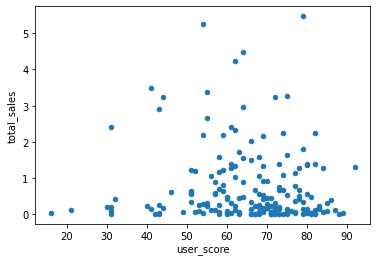

In [46]:
top_actual_platforms.query('platform == "xone" and critic_score >= 0').plot(x='critic_score', y='total_sales', kind='scatter')
print('Корреляция между оценками критиков и продажами =', top_actual_platforms.query('platform == "xone"')['critic_score'].corr(top_actual_platforms.query('platform == "xone"')['total_sales']))
top_actual_platforms.query('platform == "xone" and user_score >= 0').plot(x='user_score', y='total_sales', kind='scatter')
print('Корреляция между оценками пользователей и продажами =', top_actual_platforms.query('platform == "xone"')['user_score'].corr(top_actual_platforms.query('platform == "xone"')['total_sales']))

Корреляция между оценками критиков и продажами = 0.2971682315692345
Корреляция между оценками пользователей и продажами = 0.26981508880974253


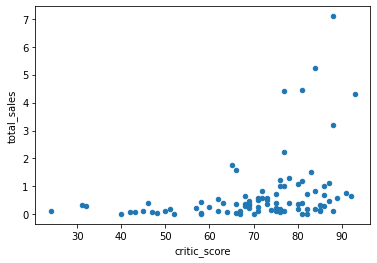

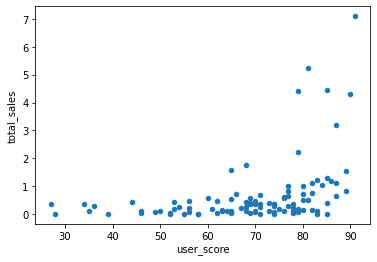

In [47]:
data.query('platform == "wiiu" and critic_score >= 0').plot(x='critic_score', y='total_sales', kind='scatter')
print('Корреляция между оценками критиков и продажами =', data.query('platform == "wiiu"')['critic_score'].corr(data.query('platform == "wiiu"')['total_sales']))
data.query('platform == "wiiu" and user_score >= 0').plot(x='user_score', y='total_sales', kind='scatter')
print('Корреляция между оценками пользователей и продажами =', data.query('platform == "wiiu"')['user_score'].corr(data.query('platform == "wiiu"')['total_sales']))

Корреляция между оценками критиков и продажами = 0.21202659312776093
Корреляция между оценками пользователей и продажами = 0.10737666999095473


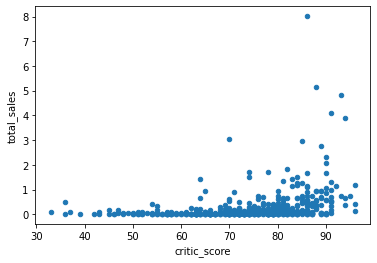

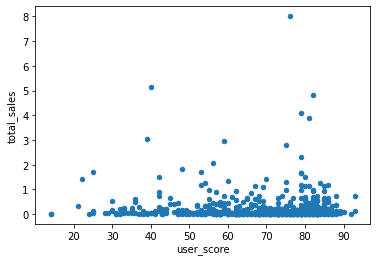

In [48]:
data.query('platform == "pc" and year_of_release > 2006 and critic_score >= 0').plot(x='critic_score', y='total_sales', kind='scatter')
print('Корреляция между оценками критиков и продажами =', data.query('platform == "pc" and year_of_release > 2006')['critic_score'].corr(data.query('platform == "pc" and year_of_release > 2006')['total_sales']))
data.query('platform == "pc" and year_of_release > 2006 and user_score >= 0').plot(x='user_score', y='total_sales', kind='scatter')
print('Корреляция между оценками пользователей и продажами =', data.query('platform == "pc" and year_of_release > 2006')['user_score'].corr(data.query('platform == "pc" and year_of_release > 2006')['total_sales']))

Видим, что у xone и pc показатели схожие, однако у wiiu пользователи очень близки по своим оценкам к критикам, из-за чего корреляция практически идентичная и характерная для оценок критиков. Возможно пользователи платформ этого производителя достаточно объективны и/или более чутко относятся к выставлению оценок. Проверим корреляции для предыдущей платформы этого производителя: wii

Корреляция между оценками критиков и продажами = 0.18838562934910374
Корреляция между оценками пользователей и продажами = 0.18428509980092644


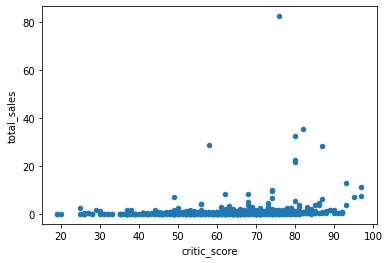

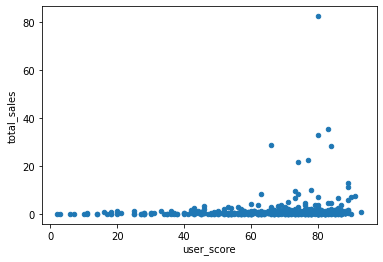

In [49]:
data.query('platform == "wii" and critic_score >= 0').plot(x='critic_score', y='total_sales', kind='scatter')
print('Корреляция между оценками критиков и продажами =', data.query('platform == "wii"')['critic_score'].corr(data.query('platform == "wii"')['total_sales']))
data.query('platform == "wii" and user_score >= 0').plot(x='user_score', y='total_sales', kind='scatter')
print('Корреляция между оценками пользователей и продажами =', data.query('platform == "wii"')['user_score'].corr(data.query('platform == "wii"')['total_sales']))

Видим, что предположение не подтвердилось. Таким образом можно сказать, что зачастую продажи коррелируют с оценками критиков и не коррелируют с оценками игроков, но изредка могут встретиться исключения. В целом можно резюмировать, что оценки критиков значительно важнее для объема продаж, чем оценки игроков.

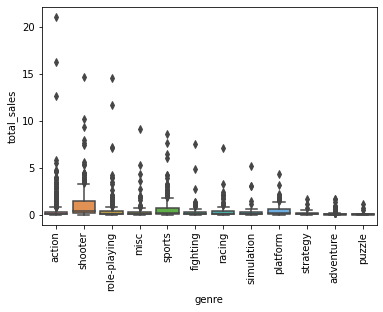

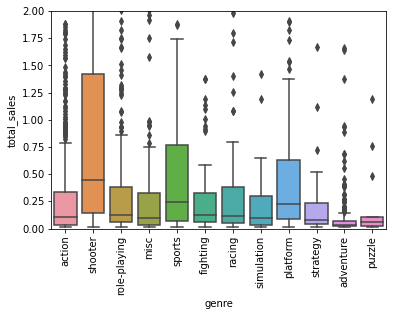

In [50]:
#top_actual_platforms.plot(x='genre', y='total_sales', kind='scatter')
#plt.xticks(rotation = 90) 
#plt.show()
sns.boxplot(x='genre', y='total_sales', data=actual_data)
plt.xticks(rotation = 90) 
plt.show()
sns.boxplot(x='genre', y='total_sales', data=actual_data).set_ylim([0, 2])
plt.xticks(rotation = 90) 
plt.show()

In [51]:
actual_data.groupby(by='genre')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
action,766.0,0.420196,1.253909,0.01,0.03,0.110,0.3375,21.05
adventure,245.0,0.096490,0.216445,0.01,0.02,0.030,0.0700,1.66
fighting,80.0,0.441375,1.048883,0.01,0.06,0.125,0.3225,7.55
misc,155.0,0.405290,1.007985,0.01,0.03,0.100,0.3300,9.18
platform,74.0,0.576081,0.806808,0.01,0.09,0.225,0.6275,4.32
puzzle,17.0,0.186471,0.325172,0.01,0.02,0.060,0.1100,1.19
racing,85.0,0.469294,0.964101,0.01,0.05,0.120,0.3800,7.09
role-playing,292.0,0.499623,1.353164,0.01,0.06,0.125,0.3825,14.60
shooter,187.0,1.245882,2.014107,0.01,0.14,0.450,1.4250,14.63


Самые устойчиво прибыльные жанры- шутер, платформер и спорт, а наименее прибыльные- симуляторы, приключения и пазлы. Разница в продажах крайне велика, поэтому на жанр необходимо обращать особое внимание. Жанр экшн имеет очень большое количество существенных выбросов.

## 3. Портрет пользователя каждого региона

### 3.1 Североамериканский регион

#### 3.1.1 Самые популярные платформы

,sum
platform,
ps4,108.74
xone,93.12
x360,81.66
ps3,63.50
3ds,38.20


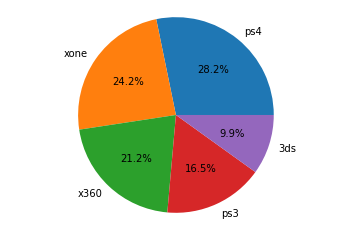

In [52]:
top_platforms_na = actual_data.groupby(['platform'])['na_sales'].agg(['sum']).sort_values(['sum'],ascending=False)
top_platforms_na = top_platforms_na.head(5)
display(top_platforms_na)
fig1, ax1 = plt.subplots()
ax1.pie(top_platforms_na['sum'], labels=top_platforms_na.index, autopct='%1.1f%%')
ax1.axis('equal')  
plt.show()

Основная доля- полноразмерные мощные домашние консоли. При этом в америке японская ps4 несильно впереди американской xone, поскольку это их отечественная платформа и она пользуется там большой популярностью. Также популярна 3ds ввиду своей портативности. А вот ПК для игр используется относительно нечасто. Видимо американцы предпочитают играть за большими телевизорами лежа на удобном диване с беспроводными геймпадами.

#### 3.1.2 Популярные жанры

,sum
genre,
action,126.05
shooter,109.74
sports,65.27
role-playing,46.40
misc,27.49


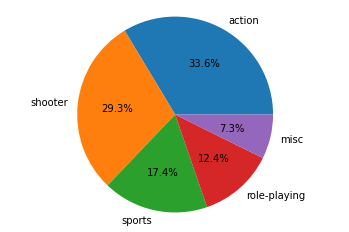

In [53]:
top_genres_na = actual_data.groupby(['genre'])['na_sales'].agg(['sum']).sort_values(['sum'],ascending=False)
top_genres_na = top_genres_na.head(5)
display(top_genres_na)
fig1, ax1 = plt.subplots()
ax1.pie(top_genres_na['sum'], labels=top_genres_na.index, autopct='%1.1f%%')
ax1.axis('equal')  
plt.show()

Самые популярные жанры: экшн, шутер, РПГ, спорт- наиболее распространенные для наиболее популярных в Северной Америке платформ.

#### 3.1.3 Влияние рейтинга на продажи

,sum
rating,
m,165.21
other,89.42
e,79.05
e10+,54.24
t,49.79


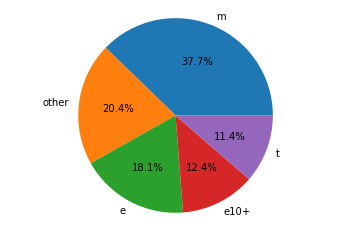

In [54]:
top_rating_na = actual_data.groupby(['rating'])['na_sales'].agg(['sum']).sort_values(['sum'],ascending=False)
display(top_rating_na)
#actual_data.plot(x='rating', y='na_sales', kind='scatter')
fig1, ax1 = plt.subplots()
ax1.pie(top_rating_na['sum'], labels=top_rating_na.index, autopct='%1.1f%%')
ax1.axis('equal')  
plt.show()

Из-за популярности "стрелялок" возрастной порог игр достаточно велик: от 17 лет. При этом 80% игр ориентырованы на Северную Америку и Канаду.

**Вывод**

Наилучшие показатели у игр для стационарных флагманских консолей жанров экшн и шутер.

### 3.2 Европейский регион

#### 3.2.1 Самые популярные платформы

,sum
platform,
ps4,141.09
ps3,67.81
xone,51.59
x360,42.52
3ds,30.96


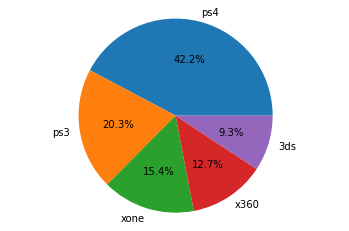

In [55]:
#top_platforms_na = actual_data.groupby(['platform'])['na_sales'].agg(['sum']).sort_values(['sum'],ascending=False)
top_platforms_eu = actual_data.groupby(['platform'])['eu_sales'].agg(['sum']).sort_values(['sum'],ascending=False)
top_platforms_eu = top_platforms_eu.head(5)
display(top_platforms_eu)
fig1, ax1 = plt.subplots()
ax1.pie(top_platforms_eu['sum'], labels=top_platforms_eu.index, autopct='%1.1f%%')
ax1.axis('equal')  
plt.show()

В европе также самая популярная платформа ps4, но уже с большим отрывом, из-за того, что популярность американской консоли xone в европе не так велика, и  частично эта ниша заполнилась ps4. Продажи на xone все еще ниже, чем у консоли ps3 предыдущего поколения. 3ds также популярна в качестве портативной платформы, но все еще на 5м месте.

#### 3.2.2 Популярные жанры

,sum
genre,
action,118.13
shooter,87.86
sports,60.52
role-playing,36.97
racing,20.19


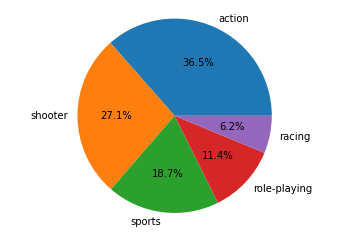

In [56]:
top_genres_eu = actual_data.groupby(['genre'])['eu_sales'].agg(['sum']).sort_values(['sum'],ascending=False)
top_genres_eu = top_genres_eu.head(5)
display(top_genres_eu)
fig1, ax1 = plt.subplots()
ax1.pie(top_genres_eu['sum'], labels=top_genres_eu.index, autopct='%1.1f%%')
ax1.axis('equal')  
plt.show()

Вследствие отсутсвия радикальной смены баланса полноразмерные консоли-ПК-портативные консоли, ассортимент популярнейших жанров практически идентичен.

#### 3.1.3 Влияние рейтинга на продажи

,sum
rating,
m,145.32
e,83.36
other,78.91
e10+,42.69
t,41.95


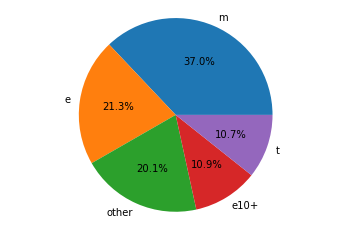

In [57]:
top_rating_eu = actual_data.groupby(['rating'])['eu_sales'].agg(['sum']).sort_values(['sum'],ascending=False)
display(top_rating_eu)
fig1, ax1 = plt.subplots()
ax1.pie(top_rating_eu['sum'], labels=top_rating_eu.index, autopct='%1.1f%%')
ax1.axis('equal')  
plt.show()

В Европе возрастной порог примерно такой же, как в Америке.

**Вывод**

В европе игроки предпочитают те же жанры на тех же платформах, но с более строгим возрастным рейтингом.

### 3.3 Японский регион

#### 3.3.1 Самые популярные платформы

,sum
platform,
3ds,67.809998
ps3,23.350000
psv,18.590000
ps4,15.960000
wiiu,10.880000


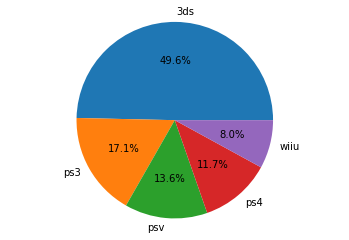

In [58]:
top_platforms_jp = actual_data.groupby(['platform'])['jp_sales'].agg(['sum']).sort_values(['sum'],ascending=False)
top_platforms_jp = top_platforms_jp.head(5)
display(top_platforms_jp)
fig1, ax1 = plt.subplots()
ax1.pie(top_platforms_jp['sum'], labels=top_platforms_jp.index, autopct='%1.1f%%')
ax1.axis('equal')  
plt.show()

В японии картина топа платформ радикально меняется: из-за трудоголичного менталитета и бешенного ритма жизни, японцам некогда расслабляться дома, они играют находу- в портативные платформы, поэтому с огромным отрывом лидирует 3ds, а psv, ранее даже не входившая в топ-5 платформ по региону, в Японии на втором месте в топе. Из домашних консолей они также предпочитают отечественные варианты: ps4 и wiiu. На ПК японцы в основном работают, а не играют.

#### 3.3.2 Популярные жанры

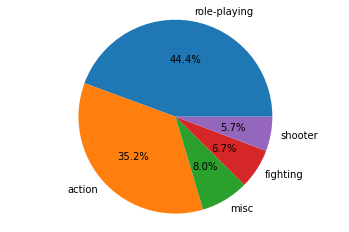

In [59]:
top_genres_jp = actual_data.groupby(['genre'])['jp_sales'].agg(['sum']).sort_values(['sum'],ascending=False)
top_genres_jp = top_genres_jp.head(5)
fig1, ax1 = plt.subplots()
ax1.pie(top_genres_jp['sum'], labels=top_genres_jp.index, autopct='%1.1f%%')
ax1.axis('equal')  
plt.show()

Из-за смены формата популярнейших платформ, поменялся и топ жанров- на портативных устройствах совсем неудобно играть в шутер или спортивные симуляторы, а вот РПГ и экшн- куда более распространенные жанры. Также видим первое появление в топе жанра fighting.

#### 3.1.3 Влияние рейтинга на продажи

,sum
rating,
other,85.050003
t,20.590000
e,15.140000
m,14.110000
e10+,5.890000


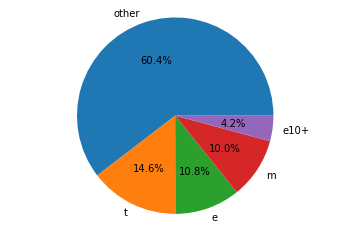

In [60]:
top_rating_jp = actual_data.groupby(['rating'])['jp_sales'].agg(['sum']).sort_values(['sum'],ascending=False)
display(top_rating_jp)
fig1, ax1 = plt.subplots()
ax1.pie(top_rating_jp['sum'], labels=top_rating_jp.index, autopct='%1.1f%%')
ax1.axis('equal')  
plt.show()

В Японии игры с рейтингом от ESRB занимают меньше 40% рынка, что говорит о доминировании игр собственного производства.

**Вывод**

В Японии следует делать основной акцент на играх для портативных консолей жанра РПГ.

Сводка по графикам:

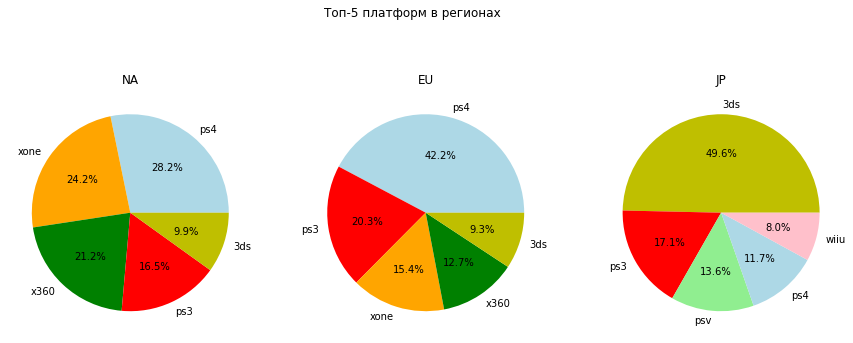

In [61]:
colors = {'ps4': 'lightblue', 'xone': 'orange', 'x360': 'g', 'ps3': 'r', '3ds': 'y', 'psv': 'lightgreen', 'wiiu': 'pink'} 
fig, axes = plt.subplots(1, 3, figsize=(15,6))
plt.suptitle("Топ-5 платформ в регионах")

for ax, df, title in zip(axes, (top_platforms_na, top_platforms_eu, top_platforms_jp), ('NA', 'EU', 'JP')):
    ax.pie(df['sum'], labels=df.index, autopct='%1.1f%%', colors=[colors[c] for c in df.index])
    ax.set_title(title)

Основная доля в Америке- полноразмерные мощные домашние консоли. При этом в америке японская ps4 несильно впереди американской xone, поскольку это их отечественная платформа и она пользуется там большой популярностью. Также популярна 3ds ввиду своей портативности. А вот ПК для игр используется относительно нечасто. Видимо американцы предпочитают играть за большими телевизорами лежа на удобном диване с беспроводными геймпадами.

В европе также самая популярная платформа ps4, но уже с большим отрывом, из-за того, что популярность американской консоли xone в европе не так велика, и  частично эта ниша заполнилась ps4. Продажи на xone все еще ниже, чем у консоли ps3 предыдущего поколения. 3ds также популярна в качестве портативной платформы, но все еще на 5м месте.

В японии картина топа платформ радикально меняется: из-за трудоголичного менталитета и бешенного ритма жизни, японцам некогда расслабляться дома, они играют находу- в портативные платформы, поэтому с огромным отрывом лидирует 3ds, а psv, ранее даже не входившая в топ-5 платформ по региону, в Японии на втором месте в топе. Из домашних консолей они также предпочитают отечественные варианты: ps и wiiu. На ПК японцы в основном работают, а не играют.

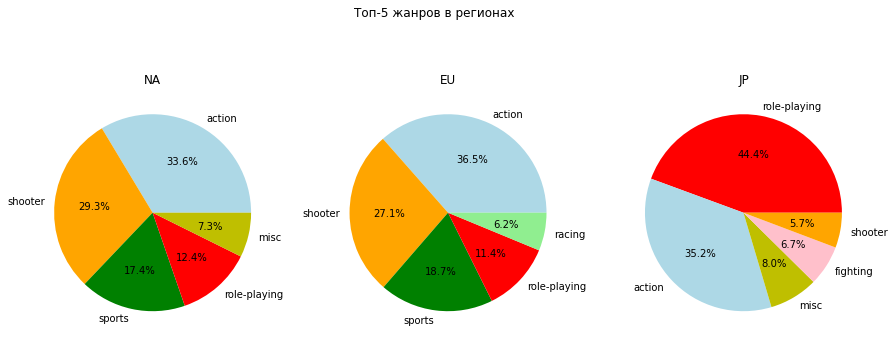

In [62]:
colors = {'action': 'lightblue', 'shooter': 'orange', 'sports': 'g', 'role-playing': 'r', 'misc': 'y', 'racing': 'lightgreen', 'fighting': 'pink'} 
fig, axes = plt.subplots(1, 3, figsize=(15,6))
plt.suptitle("Топ-5 жанров в регионах")

for ax, df, title in zip(axes, (top_genres_na, top_genres_eu, top_genres_jp), ('NA', 'EU', 'JP')):
    ax.pie(df['sum'], labels=df.index, autopct='%1.1f%%', colors=[colors[c] for c in df.index])
    ax.set_title(title)

Самые популярные жанры в Америке: экшн, шутер, РПГ, спорт- наиболее распространенные для наиболее популярных в Северной Америке платформ.

Вследствие отсутсвия радикальной смены баланса полноразмерные консоли-ПК-портативные консоли, в Европе ассортимент популярнейших жанров практически идентичен.

Из-за смены формата популярнейших платформ, в Японии поменялся и топ жанров- на портативных устройствах совсем неудобно играть в шутер или спортивные симуляторы, а вот РПГ и экшн- куда более распространенные жанры. Также видим первое появление в топе жанра fighting.

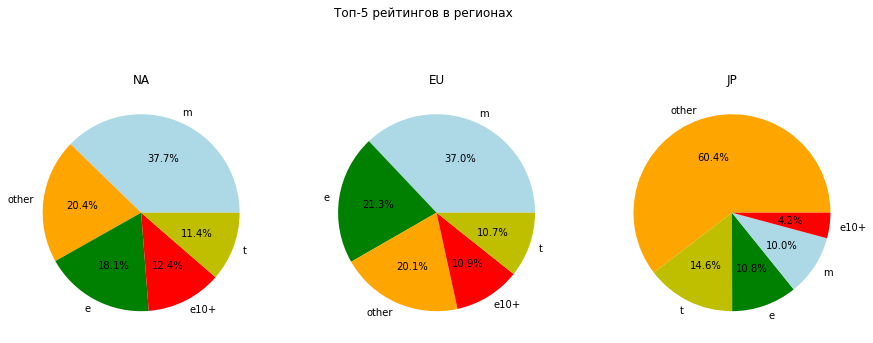

In [63]:
colors = {'m': 'lightblue', 'other': 'orange', 'e': 'g', 'e10+': 'r', 't': 'y'} 
fig, axes = plt.subplots(1, 3, figsize=(15,6))
plt.suptitle("Топ-5 рейтингов в регионах")

for ax, df, title in zip(axes, (top_rating_na, top_rating_eu, top_rating_jp), ('NA', 'EU', 'JP')):
    ax.pie(df['sum'], labels=df.index, autopct='%1.1f%%', colors=[colors[c] for c in df.index])
    ax.set_title(title)

Из-за популярности "стрелялок" возрастной порог игр достаточно велик: от 17 лет. При этом 80% игр ориентырованы на Северную Америку и Канаду. Это касается как Америки, так и Европы. В Японии игры с рейтингом от ESRB занимают меньше 40% рынка, что говорит о доминировании игр собственного производства.

**Вывод**

Наилучшие показатели у игр для стационарных флагманских консолей жанра шутер с рейтингом 17+. Это касается Америки и Европы. В Японии следует делать основной акцент на играх для портативных консолей жанра РПГ.

## 4 Проверка гипотез

### 4.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Размер выборки по pc = 155
Размер выборки по xone = 182
Гистограммы столбца user_score:


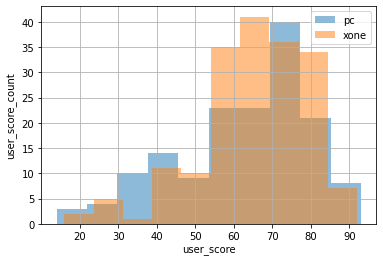

In [64]:
pc_user_score_count = actual_data.query('platform == "pc" and user_score >= 0')['user_score'].count()
print(f'Размер выборки по pc = {pc_user_score_count}')
xone_user_score_count = actual_data.query('platform == "xone" and user_score >= 0')['user_score'].count()
print(f'Размер выборки по xone = {xone_user_score_count}')
print(f'Гистограммы столбца user_score:')
hist = actual_data.query('platform == "pc" and user_score >= 0')['user_score'].hist(bins=10, alpha=0.5)
actual_data.query('platform == "xone" and user_score >= 0')['user_score'].hist(bins=10, alpha=0.5)
hist.set_xlabel("user_score")
hist.set_ylabel("user_score_count")
plt.legend(['pc', 'xone'])
plt.show()

В качестве нулевой гипотезы принимается равенство двух показателей, поэтому проверяем, равна ли средние пользовательских оценок у двух платформ между собой. Альтернативная гипотеза звучит как "неравна", поскольку нам не важно, строго меньше или строго больше одно среднее относительно другого.
Для проверки гипотез использовали критерий о равенстве средних двух генеральных совокупностей, поскольку считаем что мы обладаем случайной выборкой из генеральных совокупностей для каждой платформы и выборочные средние распределены нормально.
Размеры выборок разные, поэтому применим t-тест для двух генеральных совокупностей с параметром `equal_var = False`

In [65]:
alpha = 0.05
score_results = st.ttest_ind(
    actual_data.query('platform == "pc" and user_score >= 0')['user_score'], 
    actual_data.query('platform == "xone" and user_score >= 0')['user_score'],
    equal_var = False) 

print('p-значение:', score_results.pvalue) 

if (score_results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.1475959401343053
Не получилось отвергнуть нулевую гипотезу


**Вывод**

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Нулевая гипотеза подтверждена.

### 4.2 Средние пользовательские рейтинги жанров Action и Sports разные

Размер выборки по action = 389
Размер выборки по sports = 160
Гистограммы столбца user_score:


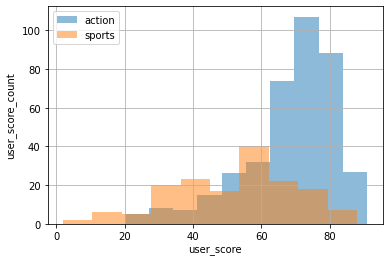

In [67]:
action_user_score_count = actual_data.query('genre == "action" and user_score >= 0')['user_score'].count()
print(f'Размер выборки по action = {action_user_score_count}')
sports_user_score_count = actual_data.query('genre == "sports" and user_score >= 0')['user_score'].count()
print(f'Размер выборки по sports = {sports_user_score_count}')
print(f'Гистограммы столбца user_score:')
hist = actual_data.query('genre == "action" and user_score >= 0')['user_score'].hist(bins=10, alpha=0.5)
actual_data.query('genre == "sports" and user_score >= 0')['user_score'].hist(bins=10, alpha=0.5)
hist.set_xlabel("user_score")
hist.set_ylabel("user_score_count")
plt.legend(['action', 'sports'])
plt.show()

В качестве нулевой гипотезы принимается равенство двух показателей, поэтому проверяем, равна ли средние пользовательских оценок у двух жанров между собой. Альтернативная гипотеза звучит как "неравна", поскольку нам не важно, строго меньше или строго больше одно среднее относительно другого.
Для проверки гипотез использовали критерий о равенстве средних двух генеральных совокупностей, поскольку считаем что мы обладаем случайной выборкой из генеральных совокупностей для каждого жанра и выборочные средние распределены нормально.
Размеры выборок разные, поэтому применим t-тест для двух генеральных совокупностей с параметром `equal_var = False`

In [68]:
alpha = 0.05
score_results = st.ttest_ind(
    actual_data.query('genre == "action" and user_score >= 0')['user_score'], 
    actual_data.query('genre == "sports" and user_score >= 0')['user_score'],
    equal_var = False) 

print('p-значение:', score_results.pvalue) 

if (score_results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.4460039700704734e-20
Отвергаем нулевую гипотезу


**Вывод**

Средние пользовательские рейтинги жанров экшн и спорт разные. Нулевая гипотеза отвергнута.

### 5 Вывод

1. Предобработка данных
- Привели к нижнему регистру названия столбцов.
- Все столбцы били исследованы на аномалии. 
- В столбце `user_score` обнаружено аномальное значение  `tbd` - аббревиатура от 'to be determined'- будет определено, то есть один из вариантов обозначения пропуска, эти значения были заменены на Nan.
- В `rating` присутствует неявный дубликат: 'E' ("Everyone", 1998-н.в.) и 'K-A' ("Kids to Adults", 1994-1997 гг.)- обозначение возрастной категории 6+, устаревшее значение было заменено.
- Были удалены строки, в которых отсутствовало название игры.
- Были удалены строки, в которых отсутствовал год релиза `year_of_release`.
- Столбец `user_score` привели в тип `float64`, затем все значения умножили на 10, чтобы оценки пользователей и экспертов были в одном числоыом диапозоне. 
- Для заплолнения пропусков выдвенем гипотезу: средняя оценка критиков равна средней оценке пользователей. Если гипотеза верна, гипотеза не подтвердтлась, поэтому пропуски заполнили характерным значением: `-1`.
- В столбце `rating` пропуски заполнили характерным значением: `other`.
- Изменены типы данных у столбцов `year_of_release`, `critic_score`, `user_score`, `jp_sales`, `other_sales`.
- Дубликаты в таблице не найдены, все значения уникальны.
- Добавили в таблицу столбец `total_sales` со значениями общих продаж.

2. Исследовательский анализ данных
- Продажи по годам. Построили график продаж от года. Из графика видно, что данные до 1996 года не очень важны, поскольку до этого ежегодные продажи оставались примерно на одном низком уровне, а с 1996 года, в связи с развитием технологий, произошел скачок ежегодных продаж.

- Вывели топ-6 платформ: ps2, x360, ps3, wii, ds, ps

- Продажи на всех платформах падают

- Корреляция между оценками критиков и продажами положительная и более ярко выражена, в то время как корреляция между оценками пользователей и продажами в разы ниже. Это значит, что продажи прямопропорциональны оценкам критиков, но о сильном влиянии на продажи оценок пользователей говорить нельзя. 

- у xone и pc показатели схожие. Зачастую продажи коррелируют с оценками критиков и не коррелируют с оценками игроков, но изредка могут встретиться исключения. В целом можно резюмировать, что оценки критиков значительно важнее для объема продаж, чем оценки игроков.

- Самые устойчиво прибыльные жанры- шутер, платформер и спорт, а наименее прибыльные- симуляторы, приключения и пазлы. Разница в продажах крайне велика, поэтому на жанр необходимо обращать особое внимание. Жанр экшн имеет очень большое количество существенных выбросов.

- Основная доля в Америке- полноразмерные мощные домашние консоли. При этом в америке японская ps4 несильно впереди американской xone, поскольку это их отечественная платформа и она пользуется там большой популярностью. Также популярна 3ds ввиду своей портативности. А вот ПК для игр используется относительно нечасто. Видимо американцы предпочитают играть за большими телевизорами лежа на удобном диване с беспроводными геймпадами.

- В европе также самая популярная платформа ps4, но уже с большим отрывом, из-за того, что популярность американской консоли xone в европе не так велика, и  частично эта ниша заполнилась ps4. Продажи на xone все еще ниже, чем у консоли ps3 предыдущего поколения. 3ds также популярна в качестве портативной платформы, но все еще на 5м месте.

- В японии картина топа платформ радикально меняется: из-за трудоголичного менталитета и бешенного ритма жизни, японцам некогда расслабляться дома, они играют находу- в портативные платформы, поэтому с огромным отрывом лидирует 3ds, а psv, ранее даже не входившая в топ-5 платформ по региону, в Японии на втором месте в топе. Из домашних консолей они также предпочитают отечественные варианты: ps и wiiu. На ПК японцы в основном работают, а не играют.

- Самые популярные жанры в Америке: экшн, шутер, РПГ, спорт- наиболее распространенные для наиболее популярных в Северной Америке платформ.

- Вследствие отсутсвия радикальной смены баланса полноразмерные консоли-ПК-портативные консоли, в Европе ассортимент популярнейших жанров практически идентичен.

- Из-за смены формата популярнейших платформ, в Японии поменялся и топ жанров- на портативных устройствах совсем неудобно играть в шутер или спортивные симуляторы, а вот РПГ и экшн- куда более распространенные жанры. Также видим первое появление в топе жанра fighting.

- Из-за популярности "стрелялок" возрастной порог игр достаточно велик: от 17 лет. При этом 80% игр ориентырованы на Северную Америку и Канаду. Это касается как Америки, так и Европы. В Японии игры с рейтингом от ESRB занимают меньше 40% рынка, что говорит о доминировании игр собственного производства.

- Наилучшие показатели у игр для стационарных флагманских консолей жанра шутер с рейтингом 17+. Это касается Америки и Европы. В Японии следует делать основной акцент на играх для портативных консолей жанра РПГ.

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

- Средние пользовательские рейтинги жанров экшн и спорт разные.